In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\JAS\Downloads\\Supply chain logisitcs problem.xlsx"  # Update the path to where your file is located
data = pd.read_excel(file_path)

print(data.head())


<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\JAS\AppData\Local\Temp\ipykernel_9536\634613580.py:7: SyntaxWarning: invalid escape sequence '\D'
  file_path = "C:\\Users\\JAS\Downloads\\Supply chain logisitcs problem.xlsx"  # Update the path to where your file is located


       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT09           3188   8

In [2]:
# Check for missing values in the dataset
print(data.isnull().sum())


data.dropna(inplace=True)


print(data.dtypes)


data['Order Date'] = pd.to_datetime(data['Order Date'])


data['Origin Port'] = data['Origin Port'].astype('category')
data['Carrier'] = data['Carrier'].astype('category')
data['Service Level'] = data['Service Level'].astype('category')
data['Plant Code'] = data['Plant Code'].astype('category')
data['Destination Port'] = data['Destination Port'].astype('category')


print(data.dtypes)
print(data.head())


Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64
Order ID                       float64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object
Order ID                       float64
Order Date              

           Order ID           Order Date          TPT  Ship ahead day count  \
count  9.215000e+03                 9215  9215.000000           9215.000000   
mean   1.447274e+09  2013-05-26 00:00:00     1.717743              1.852306   
min    1.447126e+09  2013-05-26 00:00:00     0.000000              0.000000   
25%    1.447197e+09  2013-05-26 00:00:00     1.000000              0.000000   
50%    1.447276e+09  2013-05-26 00:00:00     2.000000              3.000000   
75%    1.447346e+09  2013-05-26 00:00:00     2.000000              3.000000   
max    1.447425e+09  2013-05-26 00:00:00     4.000000              6.000000   
std    8.381629e+04                  NaN     0.630500              1.922302   

       Ship Late Day count    Product ID  Unit quantity       Weight  
count          9215.000000  9.215000e+03    9215.000000  9215.000000  
mean              0.039935  1.680536e+06    3202.747151    19.871688  
min               0.000000  1.613321e+06     235.000000     0.000000  
25% 

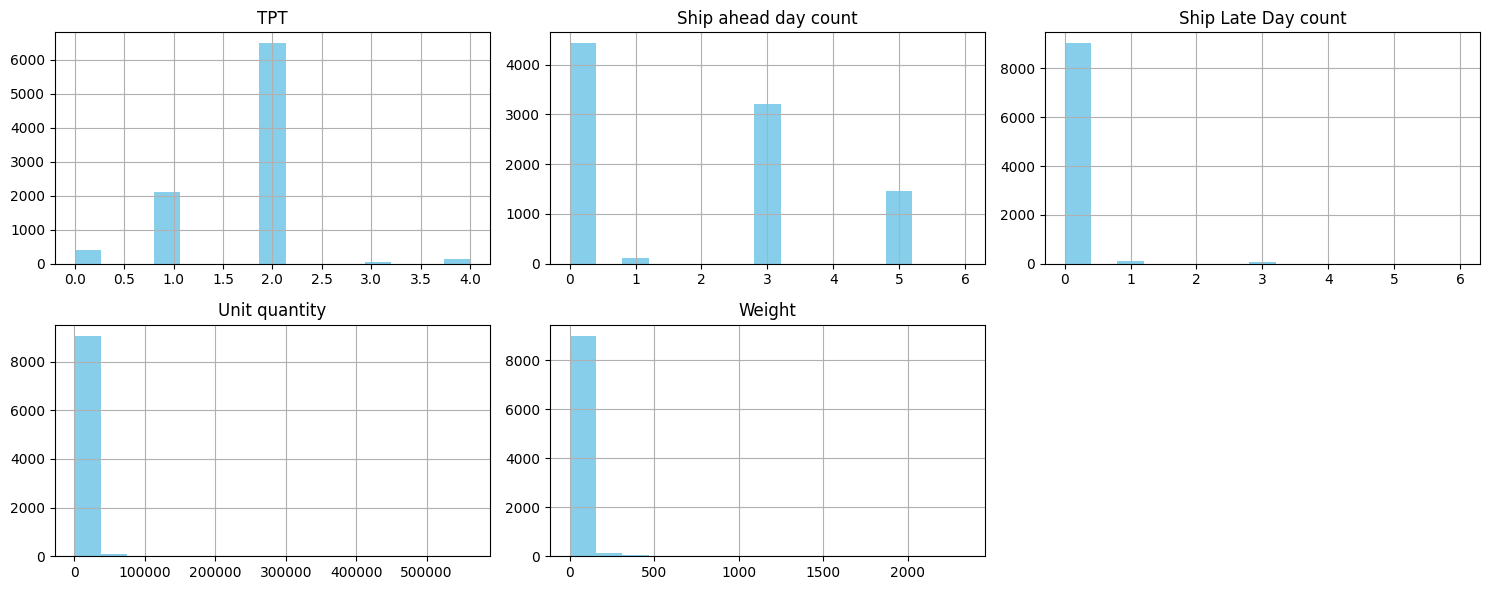

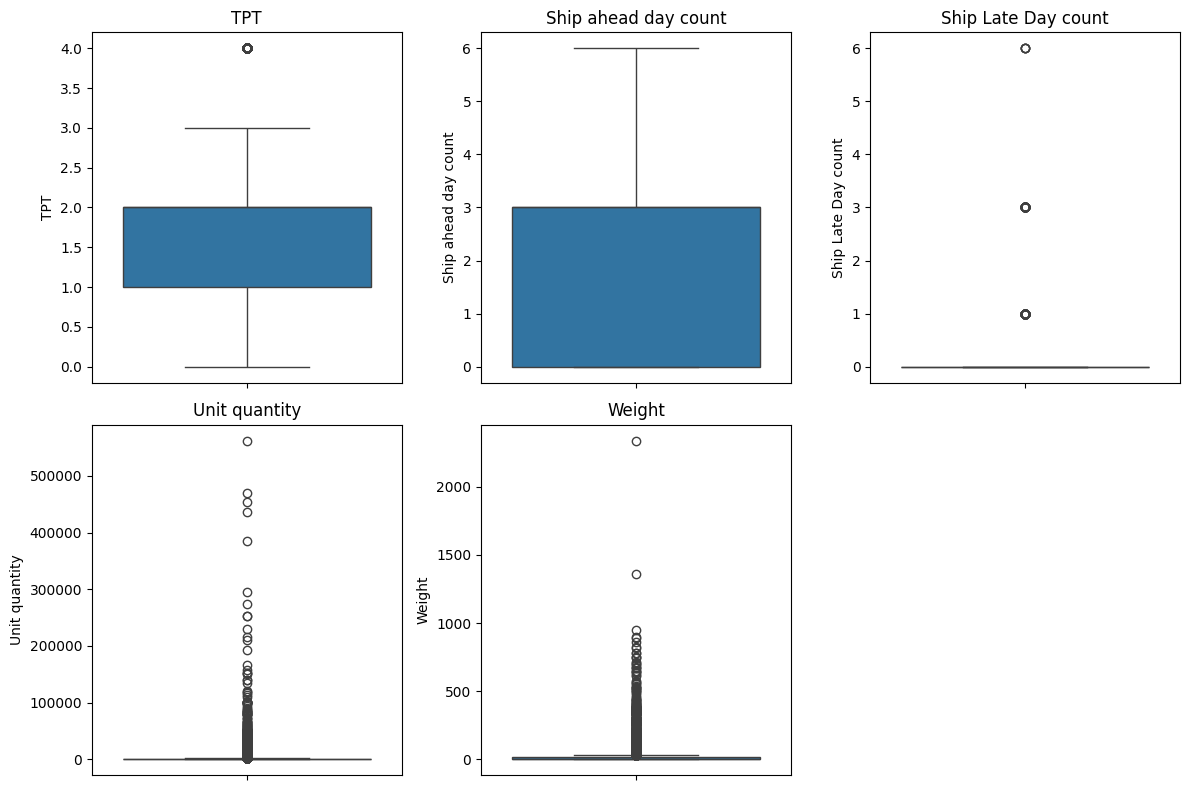

In [3]:
# Basic statistics for numerical columns
print(data.describe())

# Visualizations to understand distributions
# Histograms for numerical columns
num_columns = ['TPT', 'Ship ahead day count', 'Ship Late Day count', 'Unit quantity', 'Weight']
data[num_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3), color='skyblue')
plt.tight_layout()
plt.show()

# Box plots to identify any potential outliers in numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


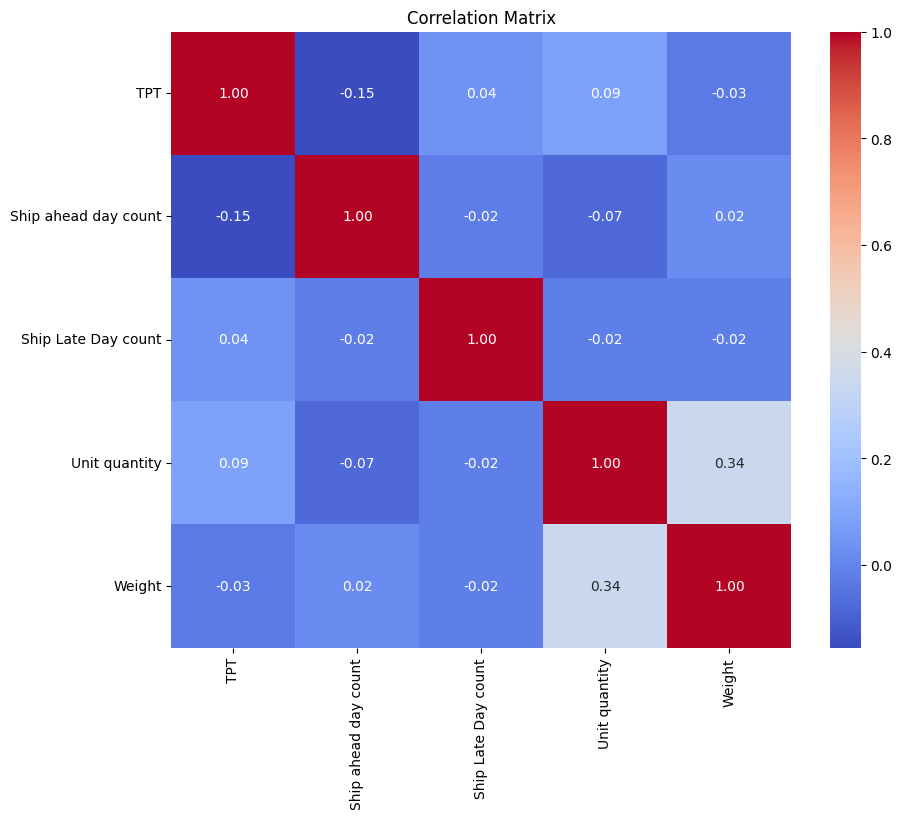

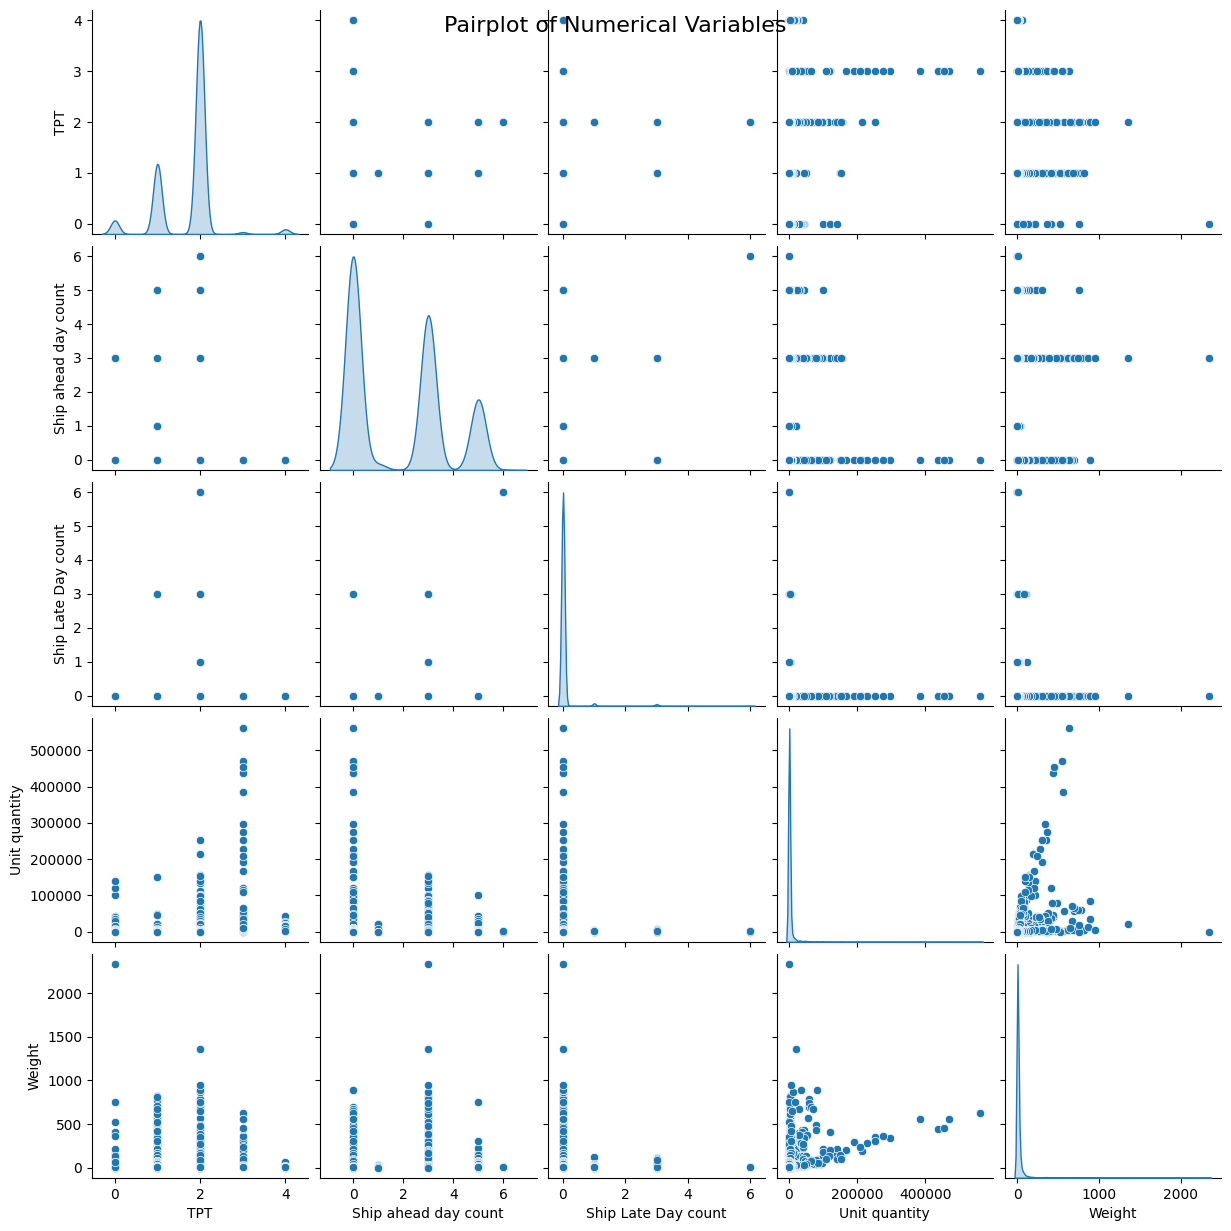

C:\Users\JAS\AppData\Local\Temp\ipykernel_9536\2339812131.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_analysis = data.groupby('Carrier')[['Unit quantity', 'Weight']].mean().reset_index()


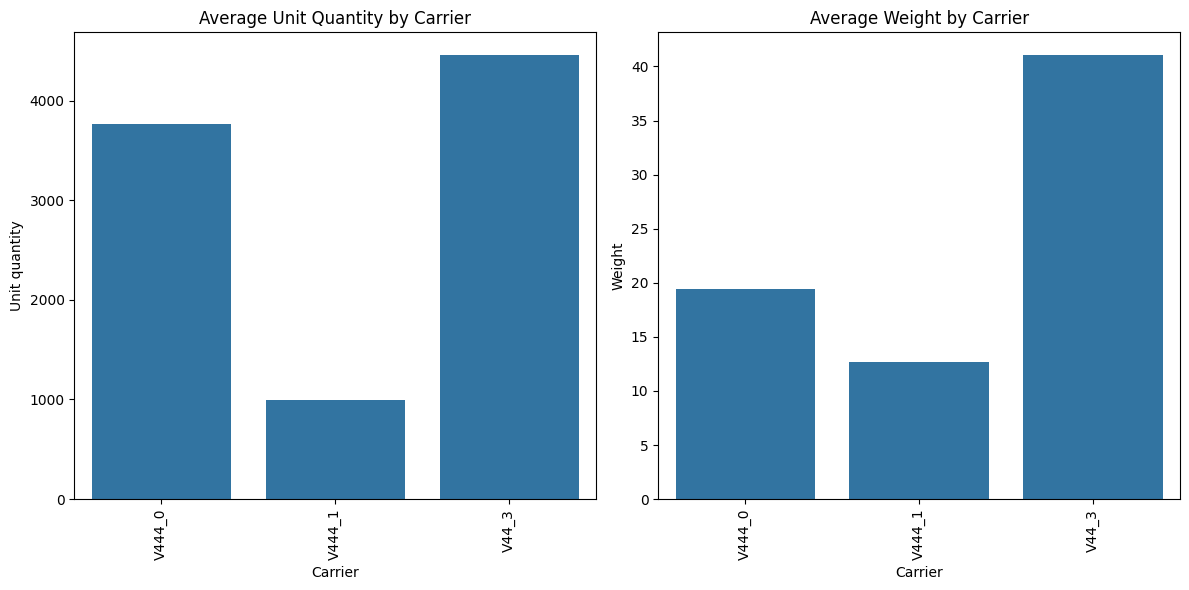

In [4]:
# Correlation matrix to see the relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize the relationships between numerical variables
sns.pairplot(data[num_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', size=16)
plt.show()

# Analyzing relationships between categorical variables and numerical outcomes
# Let's look at average unit quantity and weight shipped per carrier
# Correcting the groupby operation by using a list for selecting multiple columns
carrier_analysis = data.groupby('Carrier')[['Unit quantity', 'Weight']].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Carrier', y='Unit quantity', data=carrier_analysis)
plt.title('Average Unit Quantity by Carrier')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x='Carrier', y='Weight', data=carrier_analysis)
plt.title('Average Weight by Carrier')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [5]:

# Number of days from the order date to a reference date (e.g., the last date in the dataset)
reference_date = data['Order Date'].max()
data['Days from Reference'] = (reference_date - data['Order Date']).dt.days


# Example: Interaction between 'Unit quantity' and 'Weight' (could reflect the density or type of goods)
data['Quantity x Weight'] = data['Unit quantity'] * data['Weight']


# Since 'Carrier', 'Origin Port', 'Service Level', 'Plant Code', and 'Destination Port' are categorical, we can use one-hot encoding
categorical_columns = ['Carrier', 'Origin Port', 'Service Level', 'Plant Code', 'Destination Port']
data = pd.get_dummies(data, columns=categorical_columns)

# Checking the updated DataFrame to see the new features
print(data.head())


       Order ID Order Date  TPT  Ship ahead day count  Ship Late Day count  \
0  1.447296e+09 2013-05-26    1                     3                    0   
1  1.447158e+09 2013-05-26    1                     3                    0   
2  1.447139e+09 2013-05-26    1                     3                    0   
3  1.447364e+09 2013-05-26    1                     3                    0   
4  1.447364e+09 2013-05-26    1                     3                    0   

    Customer  Product ID  Unit quantity  Weight  Days from Reference  ...  \
0  V55555_53     1700106            808   14.30                    0  ...   
1  V55555_53     1700106           3188   87.94                    0  ...   
2  V55555_53     1700106           2331   61.20                    0  ...   
3  V55555_53     1700106            847   16.16                    0  ...   
4  V55555_53     1700106           2163   52.34                    0  ...   

   Service Level_DTD  Service Level_DTP  Plant Code_PLANT03  \
0    

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'Ship Late Day count' as the target variable for prediction
features = data.drop(columns=['Order ID', 'Order Date', 'Customer', 'Ship Late Day count'])
target = data['Ship Late Day count']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.1382195398708958


In [7]:
import shap

# Initialize the SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.initjs()  # Necessary for Jupyter Notebook visualization
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])



In [14]:
print(X_train.dtypes)


TPT                          int64
Ship ahead day count         int64
Product ID                   int64
Unit quantity                int64
Weight                     float64
Days from Reference          int64
Quantity x Weight          float64
Carrier_V444_0                bool
Carrier_V444_1                bool
Carrier_V44_3                 bool
Origin Port_PORT04            bool
Origin Port_PORT05            bool
Origin Port_PORT09            bool
Service Level_CRF             bool
Service Level_DTD             bool
Service Level_DTP             bool
Plant Code_PLANT03            bool
Plant Code_PLANT04            bool
Plant Code_PLANT08            bool
Plant Code_PLANT09            bool
Plant Code_PLANT12            bool
Plant Code_PLANT13            bool
Plant Code_PLANT16            bool
Destination Port_PORT09       bool
dtype: object


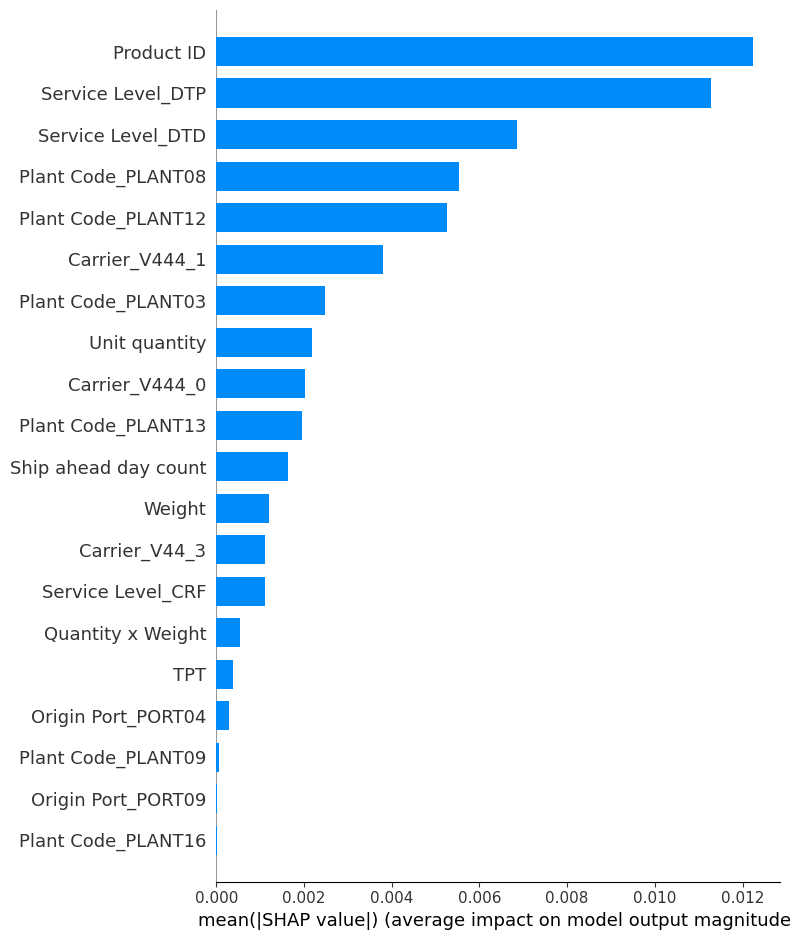

In [15]:
# Convert boolean columns to integers
for column in X_train.columns:
    if X_train[column].dtype == 'bool':
        X_train[column] = X_train[column].astype(int)
        X_test[column] = X_test[column].astype(int)

# Check and handle any NaN or infinite values
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Ensure all values are finite
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Retrain the model with cleaned data
model.fit(X_train, y_train)

# Reinitialize SHAP Explainer with the new model
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Generate and display SHAP plots
shap.summary_plot(shap_values.values, X_test, plot_type="bar")


# Operation research

In [18]:
print(data.columns)


Index(['Order ID', 'Order Date', 'TPT', 'Ship ahead day count',
       'Ship Late Day count', 'Customer', 'Product ID', 'Unit quantity',
       'Weight', 'Days from Reference', 'Quantity x Weight', 'Carrier_V444_0',
       'Carrier_V444_1', 'Carrier_V44_3', 'Origin Port_PORT04',
       'Origin Port_PORT05', 'Origin Port_PORT09', 'Service Level_CRF',
       'Service Level_DTD', 'Service Level_DTP', 'Plant Code_PLANT03',
       'Plant Code_PLANT04', 'Plant Code_PLANT08', 'Plant Code_PLANT09',
       'Plant Code_PLANT12', 'Plant Code_PLANT13', 'Plant Code_PLANT16',
       'Destination Port_PORT09'],
      dtype='object')


In [25]:
# Extract port names from column headers
origin_ports = [col.split('_')[-1] for col in data.columns if 'Origin Port_' in col]
destination_ports = [col.split('_')[-1] for col in data.columns if 'Destination Port_' in col]

# Print extracted port names to ensure correctness
print("Unique Origin Ports:", origin_ports)
print("Unique Destination Ports:", destination_ports)

# Creating a cost matrix with random costs for demonstration
import numpy as np
import pandas as pd

# Create a DataFrame to represent the cost matrix, using random data for demonstration
np.random.seed(42)  # For consistent random results
cost_matrix = pd.DataFrame(data=np.random.rand(len(origin_ports), len(destination_ports)),
                           index=origin_ports,
                           columns=destination_ports)

print("Initial Cost Matrix:")
print(cost_matrix)




Unique Origin Ports: ['PORT04', 'PORT05', 'PORT09']
Unique Destination Ports: ['PORT09']
Initial Cost Matrix:
          PORT09
PORT04  0.374540
PORT05  0.950714
PORT09  0.731994


In [26]:
def apply_vam(costs):
    supply = {port: 100 for port in costs.index}  # Example: each origin has a supply of 100 units
    demand = {port: 100 for port in costs.columns}  # Example: each destination demands 100 units
    solution = pd.DataFrame(0, index=costs.index, columns=costs.columns)

    while not costs.empty and costs.notnull().values.sum() > 0:
        # Calculate penalties for rows and columns
        row_penalties = costs.apply(lambda row: row.nsmallest(2).diff().iloc[-1], axis=1).fillna(float('inf'))
        col_penalties = costs.apply(lambda col: col.nsmallest(2).diff().iloc[-1], axis=0).fillna(float('inf'))

        # Select the highest penalty row or column
        if row_penalties.max() > col_penalties.max():
            i = row_penalties.idxmax()
        else:
            i = col_penalties.idxmax()

        min_cost_col = costs.loc[i].idxmin()
        
        # Allocate as much as possible to the min cost cell
        alloc = min(supply[i], demand[min_cost_col])
        solution.at[i, min_cost_col] = alloc
        supply[i] -= alloc
        demand[min_cost_col] -= alloc

        # Drop exhausted supply or demand
        if supply[i] == 0:
            costs.drop(index=i, inplace=True)
        if demand[min_cost_col] == 0:
            costs.drop(columns=min_cost_col, inplace=True)

    return solution

# Apply VAM to the constructed cost matrix
vam_solution = apply_vam(cost_matrix.copy())
print("VAM Solution:")
print(vam_solution)



VAM Solution:
        PORT09
PORT04     100
PORT05       0
PORT09       0
